# LAB | Imbalanced

**Load the data**

In this challenge, we will be working with Credit Card Fraud dataset.

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv

Metadata

- **distance_from_home:** the distance from home where the transaction happened.
- **distance_from_last_transaction:** the distance from last transaction happened.
- **ratio_to_median_purchase_price:** Ratio of purchased price transaction to median purchase price.
- **repeat_retailer:** Is the transaction happened from same retailer.
- **used_chip:** Is the transaction through chip (credit card).
- **used_pin_number:** Is the transaction happened by using PIN number.
- **online_order:** Is the transaction an online order.
- **fraud:** Is the transaction fraudulent. **0=legit** -  **1=fraud**


In [87]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix, f1_score
from sklearn.preprocessing import StandardScaler

from sklearn.utils import resample

import matplotlib.pyplot as plt

In [88]:
fraud = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv")
fraud.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


**Steps:**

- **1.** What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?
- **2.** Train a LogisticRegression.
- **3.** Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.
- **4.** Run **Oversample** in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model? 
- **5.** Now, run **Undersample** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?
- **6.** Finally, run **SMOTE** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model? 

In [89]:
fraud.columns

Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud'],
      dtype='object')

In [90]:
fraud.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [91]:
fraud.isna().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [92]:
fraud[["repeat_retailer", "used_chip", "used_pin_number", "online_order", "fraud"]] = fraud[["repeat_retailer", "used_chip", "used_pin_number", "online_order", "fraud"]].astype(int)

In [93]:
fraud[fraud["fraud"]== 0]["fraud"].count()

np.int64(912597)

In [94]:
fraud.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1,1,0,0,0
1,10.829943,0.175592,1.294219,1,0,0,0,0
2,5.091079,0.805153,0.427715,1,0,0,1,0
3,2.247564,5.600044,0.362663,1,1,0,1,0
4,44.190936,0.566486,2.222767,1,1,0,1,0


In [95]:
features = fraud.drop(columns = ["fraud"])
target = fraud["fraud"]

X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=0)

In [96]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled_np = scaler.transform(X_train)
X_test_scaled_np = scaler.transform(X_test)

In [97]:
log_reg = LogisticRegression()

In [98]:
X_train_scaled_df = pd.DataFrame(X_train_scaled_np, columns=X_train.columns, index=X_train.index)
X_test_scaled_df  = pd.DataFrame(X_test_scaled_np, columns=X_test.columns, index=X_test.index)

In [99]:
log_reg.fit(X_train_scaled_df, y_train)

LogisticRegression()

In [100]:
log_reg.score(X_test_scaled_df, y_test)

0.959012

In [101]:
y_pred_test_log = log_reg.predict(X_test_scaled_df)
print(classification_report(y_pred = y_pred_test_log, y_true = y_test))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98    228273
           1       0.89      0.60      0.72     21727

    accuracy                           0.96    250000
   macro avg       0.93      0.80      0.85    250000
weighted avg       0.96      0.96      0.96    250000



#### Oversampling

In [102]:
train = pd.DataFrame(X_train_scaled_np, columns=X_train.columns, index=X_train.index)

In [103]:
train["fraud"] = y_train.values

In [104]:
survived = train[train["fraud"] == 1]
no_survived = train[train["fraud"] == 0]

In [105]:
len(survived),len(no_survived)

(65676, 684324)

In [106]:
yes_oversampled = resample(survived,
                                    replace=True,
                                    n_samples = len(no_survived),
                                    random_state=0)

In [107]:
train_over = pd.concat([yes_oversampled, no_survived])
train_over

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
769328,0.022408,-0.183986,0.992120,0.366317,1.361705,-0.334756,0.732342,1
347265,-0.396965,-0.128017,1.056225,-2.729877,-0.734374,-0.334756,-1.365482,1
175080,-0.188127,-0.155662,0.821662,0.366317,-0.734374,-0.334756,0.732342,1
635243,1.788784,-0.150307,-0.253831,0.366317,-0.734374,-0.334756,0.732342,1
801075,-0.041481,-0.177092,1.083831,0.366317,1.361705,-0.334756,0.732342,1
...,...,...,...,...,...,...,...,...
963395,0.683502,-0.071124,-0.607568,0.366317,-0.734374,-0.334756,0.732342,0
117952,-0.358147,0.292591,0.107062,0.366317,-0.734374,-0.334756,0.732342,0
435829,0.002289,-0.023247,-0.478098,0.366317,-0.734374,2.987249,-1.365482,0
305711,-0.223016,-0.183924,-0.011000,0.366317,-0.734374,-0.334756,0.732342,0


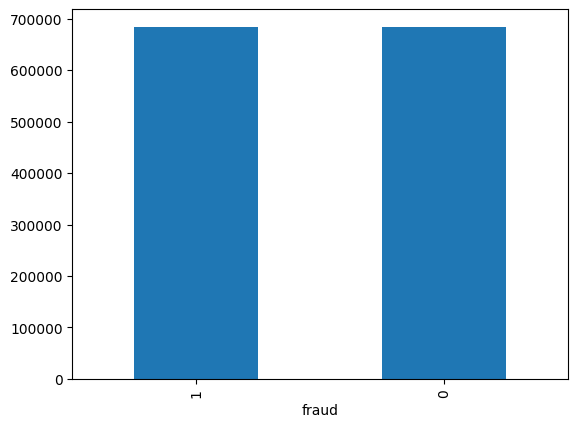

In [108]:
survived_plt = train_over["fraud"].value_counts()
survived_plt.plot(kind="bar")
plt.show()

In [109]:
X_train_over = train_over.drop(columns = ["fraud"])
y_train_over = train_over["fraud"]

In [110]:
log_reg = LogisticRegression()
log_reg.fit(X_train_over, y_train_over)

LogisticRegression()

In [111]:
y_pred_test_log = log_reg.predict(X_test_scaled_df)
print(classification_report(y_pred = y_pred_test_log, y_true = y_test))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96    228273
           1       0.57      0.95      0.71     21727

    accuracy                           0.93    250000
   macro avg       0.78      0.94      0.84    250000
weighted avg       0.96      0.93      0.94    250000



In [112]:
from imblearn.over_sampling import SMOTE

In [113]:
sm = SMOTE(random_state = 1,sampling_strategy=1.0)

In [114]:
X_train_sm, y_train_sm =  sm.fit_resample(X_train_scaled_df,y_train) # .fit() doesn't exists!!!

- Now lets train our model, to see if get any improvements.

In [115]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_sm, y_train_sm)

LogisticRegression(max_iter=1000)

- Evaluate our model

In [116]:
y_pred_test_log = log_reg.predict(X_test_scaled_df)
print(classification_report(y_pred = y_pred_test_log, y_true = y_test))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96    228273
           1       0.57      0.95      0.71     21727

    accuracy                           0.93    250000
   macro avg       0.78      0.94      0.84    250000
weighted avg       0.96      0.93      0.94    250000



UNDERSAMPLE

In [117]:
no_undersampled = resample(no_survived,
                                    replace=False,
                                    n_samples = len(survived),
                                    random_state=0)
no_undersampled

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
681604,-0.337726,-0.097881,-0.114767,0.366317,-0.734374,-0.334756,0.732342,0
971349,0.176805,-0.137869,0.055000,0.366317,-0.734374,-0.334756,0.732342,0
796484,-0.373962,-0.104425,-0.300128,0.366317,-0.734374,-0.334756,-1.365482,0
699524,-0.388393,-0.177113,-0.576791,-2.729877,-0.734374,2.987249,-1.365482,0
575548,-0.306372,-0.070528,-0.629536,0.366317,-0.734374,-0.334756,-1.365482,0
...,...,...,...,...,...,...,...,...
773754,-0.154981,-0.077391,-0.303269,0.366317,-0.734374,-0.334756,-1.365482,0
317200,-0.377846,-0.157243,-0.477677,0.366317,-0.734374,-0.334756,0.732342,0
631191,0.360789,-0.062674,0.387490,0.366317,-0.734374,-0.334756,-1.365482,0
249121,-0.377066,-0.183883,-0.344867,0.366317,1.361705,-0.334756,0.732342,0


In [118]:
train_under = pd.concat([no_undersampled, survived])
train_under

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
681604,-0.337726,-0.097881,-0.114767,0.366317,-0.734374,-0.334756,0.732342,0
971349,0.176805,-0.137869,0.055000,0.366317,-0.734374,-0.334756,0.732342,0
796484,-0.373962,-0.104425,-0.300128,0.366317,-0.734374,-0.334756,-1.365482,0
699524,-0.388393,-0.177113,-0.576791,-2.729877,-0.734374,2.987249,-1.365482,0
575548,-0.306372,-0.070528,-0.629536,0.366317,-0.734374,-0.334756,-1.365482,0
...,...,...,...,...,...,...,...,...
227838,-0.341167,0.292693,5.736074,0.366317,1.361705,-0.334756,0.732342,1
303648,1.390671,-0.139933,-0.601331,0.366317,-0.734374,-0.334756,0.732342,1
556209,-0.299880,-0.179672,0.778995,0.366317,-0.734374,-0.334756,0.732342,1
370648,1.820991,-0.184583,-0.444995,0.366317,-0.734374,-0.334756,0.732342,1


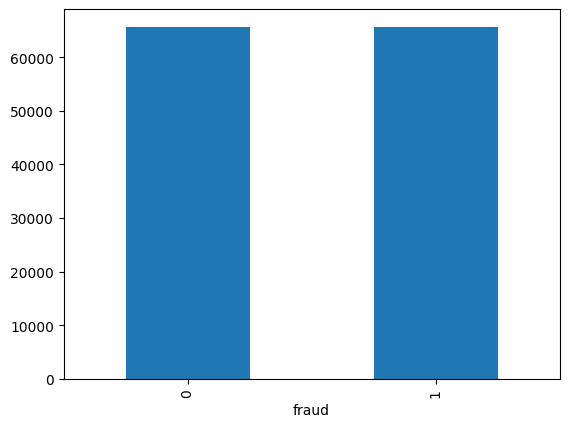

In [119]:
survived_plt = train_under["fraud"].value_counts()
survived_plt.plot(kind="bar")
plt.show()

Now, we have the same amount of observations for both survived and not_survived. Let's see how it can impact our model

- Separating our features from our target

In [122]:
X_train_under = train_under.drop(columns = ["fraud"])
y_train_under = train_under["fraud"]

- Model training

In [123]:
log_reg = LogisticRegression()
log_reg.fit(X_train_under, y_train_under)

LogisticRegression()

- Evaluate our model

In [124]:
y_pred_test_log = log_reg.predict(X_test_scaled_df)
print(classification_report(y_pred = y_pred_test_log, y_true = y_test))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96    228273
           1       0.57      0.95      0.71     21727

    accuracy                           0.93    250000
   macro avg       0.78      0.94      0.84    250000
weighted avg       0.96      0.93      0.94    250000

